## Doppler Ultrasound

We are first going to simulate the pulses that are leaving our transducer. Diagnostic ultrasound frequencies are from 1-20 MHz, however, for our specific use case of
aortic


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [6]:
# Initialize the Transducer Characteristics and Common Time Array
freq_t = 1E6 # 1 MHz transducer
wavelength = 1/freq_t # this is intrinsic to our system
pulsewidth = 5 * wavelength # this is intrinsic to our system
PRF = 10E3 # aka pulse repetition frequency, 10 kHz the high end
btwnpulse = 1/PRF # this will be what we change depending on the speed of the RBCs

t = np.arange(0,(pulsewidth+btwnpulse)*4,1E-8); # 1/(1E-8) will be our sampling frequency, I believe

Text(0.5, 1.0, 'Waveforms being sent out by Tranducer')

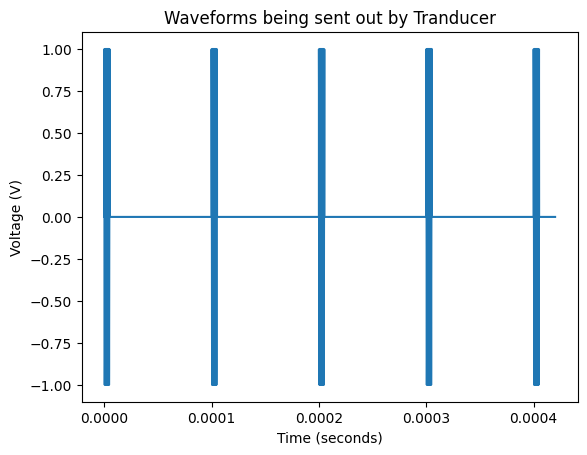

In [7]:
rect = t*0
rects = t*0

for n in np.arange(0,5,1): # making the pulse waves and their frequencies
   newrect = (t<pulsewidth+btwnpulse*n)*1*(t>btwnpulse*(n))*np.cos(2*np.pi*1E6*(t-n*btwnpulse))
   rects = rects + newrect

transduceroutput = rects # this is what we are sending out 
plt.plot(t,transduceroutput)
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage (V)')
plt.title('Waveforms being sent out by Tranducer')

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize the Transducer Characteristics and Common Time Array
freq_t = 1E6 # 1 MHz transducer
wavelength = 1/freq_t # this is intrinsic to our system
pulsewidth = 5 * wavelength # this is intrinsic to our system
PRF = 10E3
btwnpulse = 1/PRF

t = np.arange(0,(pulsewidth+btwnpulse)*10,1E-8)

def makepulses(t,velocity,theta,reps,pulsewidth,btwnpulse): # t is an array, velocity in m/s
    rects = t*0
    Fd = 2*1E6*(velocity/1540)*np.cos(theta)
    btwnpulse_freq = 10E3 + Fd
    btwnpulse = 1/btwnpulse_freq
    for n in np.arange(0,reps,1): # making the pulse waves and their frequencies
        newrect = (t<pulsewidth+btwnpulse*n)*1*(t>btwnpulse*(n))*np.cos(2*np.pi*1E6*(t-n*btwnpulse))
        rects = rects + newrect

    return rects

healthy = makepulses(t,1.5,0,15,pulsewidth,btwnpulse)
mild = makepulses(t,2,0,15,pulsewidth,btwnpulse)
mod = makepulses(t,3,0,15,pulsewidth,btwnpulse)
severe = makepulses(t,5,0,25,pulsewidth,btwnpulse)
modrev = makepulses(t,-3,0,25,pulsewidth,btwnpulse)

Formula for doppler: velocity = c(Fr - Ft)/(2 * F0 * cos(theta))

Simplified Bernoulli Equation: P = 4v^2 to convert velocity to pressure to diagnose stenosis

Text(0.5, 1.0, 'Fourier Transform')

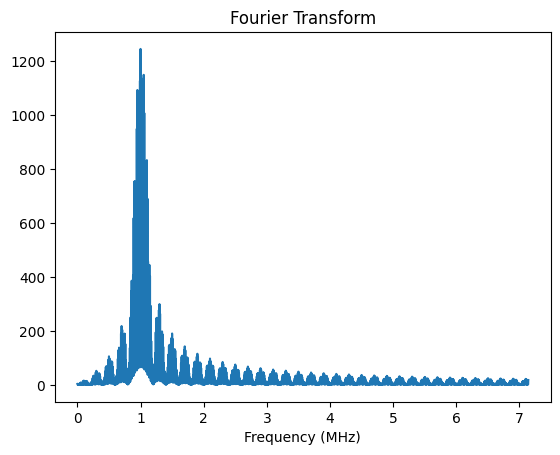

In [48]:
time = t[1] - t[0]
freq = np.fft.fftshift(np.fft.fftfreq(len(transduceroutput), time))
freq_transducer = np.abs(np.fft.fftshift(np.fft.fft(transduceroutput)))
length = len(freq) //2
plt.plot(freq[length:length+3000]/1e6, freq_transducer[length:length+3000])
plt.xlabel("Frequency (MHz)")
plt.title("Fourier Transform")
# plt.plot(freq, fref)

## Healthy Reconstruction

Average time between peaks: 8.377916666666666e-05
Frequency:  1936.1416422141551
Velocity in m/s  1.4908290645048996


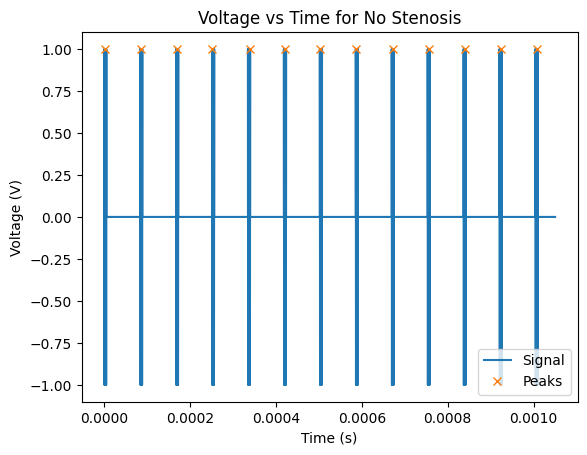

In [49]:
peaks, _ = find_peaks(healthy, distance=1000)
# Calculate the time differences between consecutive peaks
peak_times = t[peaks]  # Times of the peaks
time_diffs = np.diff(peak_times)  # Time differences between peaks

# Compute the average time between peaks
average_time_between_peaks_healthy = np.mean(time_diffs)
Fd = (1 - average_time_between_peaks_healthy*10**4) / average_time_between_peaks_healthy
print("Average time between peaks:", average_time_between_peaks_healthy)
print("Frequency: ", Fd)

c=1540
velocity_healthy = c*(Fd)/(2*1e6)
print("Velocity in m/s ", velocity_healthy)

# Plot the signal and the peaks
plt.plot(t, healthy, label='Signal')
plt.plot(t[peaks], healthy[peaks], 'x', label='Peaks')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Voltage vs Time for No Stenosis')
plt.legend()
plt.show()

Pressure Calculation

In [50]:
pressure_healthy = 4*velocity_healthy**2
print("Pressure is: ", pressure_healthy, 'mmHg')

Pressure is:  8.890285198290217 mmHg


## Mild Reconstruction

Average time between peaks: 7.930461538461539e-05
Frequency:  2609.6065802746953
Velocity in m/s  2.0093970668115153


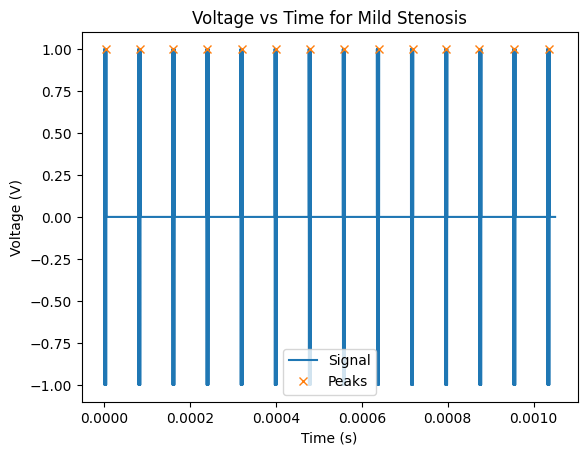

In [51]:
peaks, _ = find_peaks(mild, distance=1000)
# Calculate the time differences between consecutive peaks
peak_times = t[peaks]  # Times of the peaks
time_diffs = np.diff(peak_times)  # Time differences between peaks

# Compute the average time between peaks
average_time_between_peaks_mild = np.mean(time_diffs)
Fd = (1 - average_time_between_peaks_mild*10**4) / average_time_between_peaks_mild
print("Average time between peaks:", average_time_between_peaks_mild)
print("Frequency: ", Fd)

c=1540
velocity_mild = c*Fd/(2*1e6)
print("Velocity in m/s ", velocity_mild)

# Plot the signal and the peaks
plt.plot(t, mild, label='Signal')
plt.plot(t[peaks], mild[peaks], 'x', label='Peaks')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Voltage vs Time for Mild Stenosis')
plt.legend()
plt.show()

Pressure Calculation

In [52]:
pressure_mild = 4*velocity_mild**2
print("Pressure is: ", pressure_mild, 'mmHg')

Pressure is:  16.150706288442887 mmHg


## Moderate Reconstruction

Average time between peaks: 7.217714285714285e-05
Frequency:  3854.801678410262
Velocity in m/s  2.9681972923759017


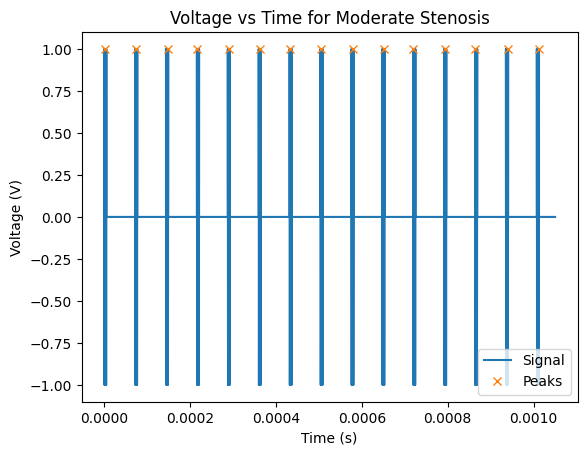

In [53]:
peaks, _ = find_peaks(mod, distance=1000)
# Calculate the time differences between consecutive peaks
peak_times = t[peaks]  # Times of the peaks
time_diffs = np.diff(peak_times)  # Time differences between peaks

# Compute the average time between peaks
average_time_between_peaks_mod = np.mean(time_diffs)
Fd = (1 - average_time_between_peaks_mod*10**4) / average_time_between_peaks_mod
print("Average time between peaks:", average_time_between_peaks_mod)
print("Frequency: ", Fd)

c=1540
velocity_mod = c*Fd/(2*1e6)
print("Velocity in m/s ", velocity_mod)

# Plot the signal and the peaks
plt.plot(t, mod, label='Signal')
plt.plot(t[peaks], mod[peaks], 'x', label='Peaks')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Voltage vs Time for Moderate Stenosis')
plt.legend()
plt.show()

Pressure Calculation

In [54]:
pressure_mod = 4*velocity_mod**2
print("Pressure is: ", pressure_mod, 'mmHg')

Pressure is:  35.24078066587054 mmHg


## Severe Reconstruction

Average time between peaks: 6.051235294117647e-05
Frequency:  6525.551418767196
Velocity in m/s  5.024674592450741


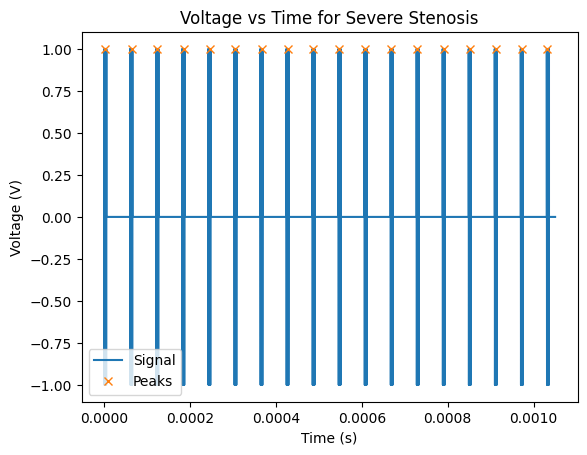

In [55]:
peaks, _ = find_peaks(severe, distance=1000)
# Calculate the time differences between consecutive peaks
peak_times = t[peaks]  # Times of the peaks
time_diffs = np.diff(peak_times)  # Time differences between peaks

# Compute the average time between peaks
average_time_between_peaks_severe = np.mean(time_diffs)
Fd = (1 - average_time_between_peaks_severe*10**4) / average_time_between_peaks_severe
print("Average time between peaks:", average_time_between_peaks_severe)
print("Frequency: ", Fd)

c=1540
velocity_severe = c*Fd/(2*1e6)
print("Velocity in m/s ", velocity_severe)

# Plot the signal and the peaks
plt.plot(t, severe, label='Signal')
plt.plot(t[peaks], severe[peaks], 'x', label='Peaks')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Voltage vs Time for Severe Stenosis')
plt.legend()
plt.show()

Pressure Calculation

In [56]:
pressure_severe = 4*velocity_severe**2
print("Pressure is: ", pressure_severe, 'mmHg')

Pressure is:  100.98941904008008 mmHg


## Parameter Sweep of Angles

Average time between peaks: 8.377916666666666e-05
Frequency:  1936.1416422141551


Text(0, 0.5, 'Velocity (m/s)')

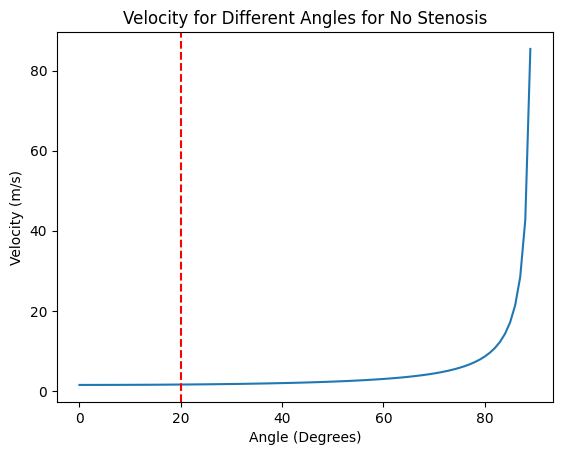

In [58]:
peaks, _ = find_peaks(healthy, distance=1000)
# Calculate the time differences between consecutive peaks
peak_times = t[peaks]  # Times of the peaks
time_diffs = np.diff(peak_times)  # Time differences between peaks

# Compute the average time between peaks
average_time_between_peaks = np.mean(time_diffs)
Fd = (1 - average_time_between_peaks*10**4) / average_time_between_peaks
print("Average time between peaks:", average_time_between_peaks)
print("Frequency: ", Fd)

angles = np.arange(0, 90)
angles_radians = np.radians(angles)

c=1540
velocity_healthy_angle = c*Fd/(2*1e6*np.cos(angles_radians))
plt.plot(angles, velocity_healthy_angle)
plt.axvline(x=20, color='r', linestyle='--', label='20 degrees')
plt.title('Velocity for Different Angles for No Stenosis')
plt.xlabel("Angle (Degrees)")
plt.ylabel('Velocity (m/s)')

## Analyzing Direction of Flow

In [1]:
# Looking at Reverse Flow, want to demonstrate that you have to move the transducer once you know the anatomy. Can't just leave it there.
# Right now, we have the transducer moving toward the transducer.
dv = 0.1
velocity_array = np.arange(-8,0,dv) # in m/s
velocity_array2 = np.arange(0,8,dv)
#print((velocity_array))
theta = 0 # the blood flow is going directly towards
Fd_array = 2*1E6*(velocity_array/1540)*np.cos(theta)
Fd_array2 = 2*1E6*(velocity_array2/1540)*np.cos(theta)
plt.figure()
plt.plot(velocity_array,Fd_array)
plt.xlabel('Velocity (m/s)')
plt.ylabel('Frequency Shift (Hz)')
plt.title('Frequency Shifts over Speed')
plt.grid()


# Notice how the frequency shifts are negative. This presents us a problem...
# Earlier we calculated the time between pulses, or the period
btwnpulse_array = btwnpulse*np.ones(np.shape(velocity_array)[0]) + 1/Fd_array
btwnpulse_array2 = btwnpulse*np.ones(np.shape(velocity_array)[0]) + 1/Fd_array2
plt.figure(figsize=(14,6))
plt.suptitle('Incidence Theta = 0')
plt.subplot(1,2,1)
plt.plot(velocity_array,btwnpulse_array)
plt.xlabel('Velocity (m/s)')
plt.ylabel('Period of the Pulses')

plt.subplot(1,2,2)
plt.plot(velocity_array2,btwnpulse_array2)
plt.xlabel('Velocity (m/s)')
plt.ylabel('Period of the Pulses')


# When we look at the graphs, we cannot have a negative period. Periods must be positive. Thus, it is up to the ultrasound technician to wiggle the ultrasound transducer to
# an angle whereby they can properly interpret the results. A solid understanding of anatomy and physiology is required.

theta2 = np.pi # the blood flow is going directly away
Fd_array3 = 2*1E6*(velocity_array/1540)*np.cos(theta2)
Fd_array4 = 2*1E6*(velocity_array2/1540)*np.cos(theta2)
btwnpulse_array3 = btwnpulse*np.ones(np.shape(velocity_array)[0]) + 1/Fd_array3
btwnpulse_array4 = btwnpulse*np.ones(np.shape(velocity_array)[0]) + 1/Fd_array4
plt.figure(figsize=(14,6))
plt.suptitle('Incidence Theta = 180')
plt.subplot(1,2,1)
plt.plot(velocity_array,btwnpulse_array3)
plt.xlabel('Velocity (m/s)')
plt.ylabel('Period of the Pulses')

plt.subplot(1,2,2)
plt.plot(velocity_array2,btwnpulse_array4)
plt.xlabel('Velocity (m/s)')
plt.ylabel('Period of the Pulses')

# 180 degrees is when blood is going away, however, it is only valid for negative values of velocity. Again ,it is up to the technician to adjust the transducer
# to an angle which can read. Then based on the physiology, they can find out the direction of the blood, at least for pulse wave doppler. Maybe we need to explore continuous doppler.

NameError: name 'np' is not defined

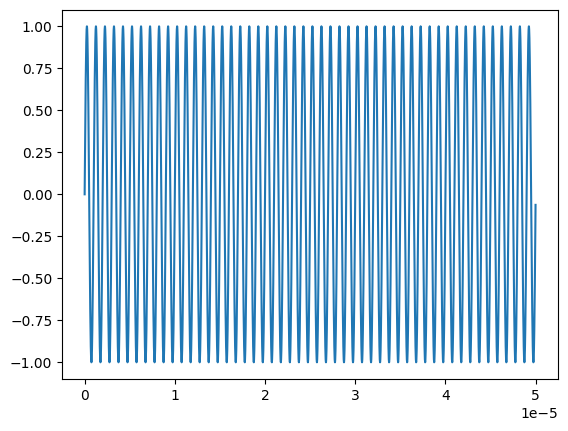

In [9]:
# Continuous Doppler Simulation (simplified) - WORK IN PROGRESS IF WE WANT

# Initialize the Transducer Characteristics and Common Time Array
freq_t = 1E6 # 1 MHz transducer
wavelength = 1/freq_t # this is intrinsic to our system
pulsewidth = 5 * wavelength # this is intrinsic to our system
PRF = 10E3 # aka pulse repetition frequency, 10 kHz the high end
btwnpulse = 1/PRF # this will be what we change depending on the speed of the RBCs

t_cont = np.arange(0,(pulsewidth*10),1E-8)

cont_out = np.sin(2*np.pi*freq_t*t_cont)
plt.plot(t_cont,cont_out)

